In [1]:
import pandas as pd
import seaborn as sns
df_std = pd.read_csv("../data/cnn_size_std_mode.csv")
df_max = pd.read_csv("../data/cnn_size_max_mode.csv")
df = pd.concat([df_std[df_std["round"] == "output-round6"], df_max])

In [2]:
df.columns

Index(['Unnamed: 0', 'filename', 'filters_per_layer', 'number_of_layers',
       'total_filters', 'kernel_size', 'input_size', 'cpu_utilization_avg',
       'memory_utilization_avg', 'cpu_power_avg', 'tpu_power_avg',
       'inference_time', 'usb_type', 'tpu_mode', 'block_type',
       'total_power_avg', 'total_energy_joules', 'joules_per_input',
       'inference_time_per_input', 'processed_inputs', 'round'],
      dtype='object')

In [3]:
palette_1 = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
palette_2 = sns.cubehelix_palette( as_cmap=True)
df['USB type & TPU mode'] = df['usb_type'].astype(str) + ', ' + df['tpu_mode'].astype(str)

C:\apps\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


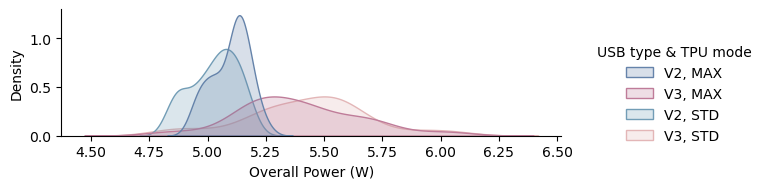

In [4]:
ax = sns.displot(data=df[(df["block_type"]=="fullconv")], 
                x="total_power_avg", 
                hue = 'USB type & TPU mode', 
                kind="kde",
                fill=True, 
                height=2, aspect=3, palette=[palette_1.colors[130], palette_2.colors[100],palette_1.colors[100],palette_2.colors[30]])

ax.set(xlabel='Overall Power (W)')
new_labels = ['V2, MAX', 'V3, MAX', 'V2, STD', 'V3, STD']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)
ax.figure.savefig("../output/power_density.png")

C:\apps\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


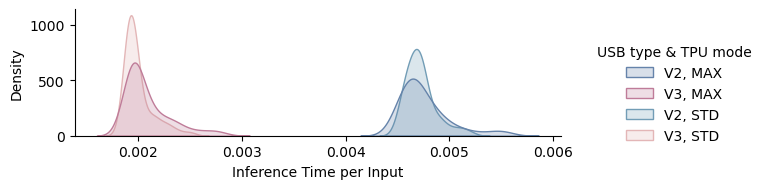

In [5]:
ax = sns.displot(data=df[(df["block_type"]=="fullconv")], 
                x="inference_time_per_input", 
                hue = 'USB type & TPU mode', 
                kind="kde", 
                fill=True, 
                height=2, aspect=3, palette=[palette_1.colors[130], palette_2.colors[100],palette_1.colors[100],palette_2.colors[30]])
ax.set(xlabel='Inference Time per Input')
new_labels = ['V2, MAX', 'V3, MAX', 'V2, STD', 'V3, STD']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)
ax.figure.savefig("../output/inference_time_density.png")

C:\apps\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


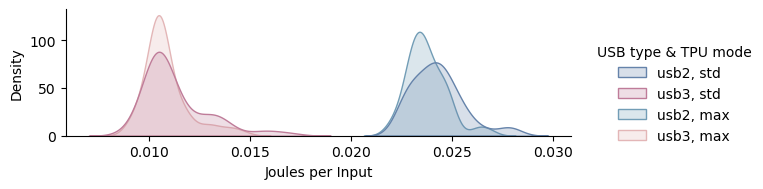

In [6]:
ax = sns.displot(data=df[(df["block_type"]=="fullconv")], 
                x="joules_per_input", 
                hue = 'USB type & TPU mode', 
                kind="kde", 
                fill=True, 
                height=2, aspect=3, palette=[palette_1.colors[130], palette_2.colors[100],palette_1.colors[100],palette_2.colors[30]])
ax.set(xlabel='Joules per Input')
ax.figure.savefig("../output/joules_density.png")